In [1]:
from matplotlib import pyplot as plt
from episuite.mobility import facebook

### Load Movement Range Maps data
The Episuite API for the Facebook Movement Range Maps allows you to download the entire range maps data or to filter by a single country by using a country code. We will here just download data from Brazil using the `BRA` country code.

The movement range maps are increasing in size every day, that's why filtering by your country code is highly recommended. If you specify the `country_code` while calling the `load_movement_range()`, Episuite will filter the dataset without loading it entirely to memory.

In [2]:
client = facebook.FacebookMovementRange()

In [3]:
mrange_data = client.load_movement_range(country_code="BRA")

In [4]:
mrange_data.tail(8)

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
1525975,2021-03-12,BRA,GADM,BRA.9.98_1,Guapó,-0.19013,0.25627,full_february,DAY_OF_WEEK
1525976,2021-03-13,BRA,GADM,BRA.9.98_1,Guapó,-0.25377,0.26759,full_february,DAY_OF_WEEK
1525977,2021-03-14,BRA,GADM,BRA.9.98_1,Guapó,-0.27125,0.31333,full_february,DAY_OF_WEEK
1525978,2021-03-15,BRA,GADM,BRA.9.98_1,Guapó,-0.11685,0.25014,full_february,DAY_OF_WEEK
1525979,2021-03-16,BRA,GADM,BRA.9.98_1,Guapó,-0.09969,0.28633,full_february,DAY_OF_WEEK
1525980,2021-03-17,BRA,GADM,BRA.9.98_1,Guapó,-0.12332,0.26972,full_february,DAY_OF_WEEK
1525981,2021-03-18,BRA,GADM,BRA.9.98_1,Guapó,-0.20530,0.28424,full_february,DAY_OF_WEEK
1525982,2021-03-19,BRA,GADM,BRA.9.98_1,Guapó,-0.17599,0.25957,full_february,DAY_OF_WEEK


The Movement Range Maps uses the country codes and geographical data from [GADM](https://gadm.org/). So you will have to download it to be able to plot geographical data. You can also filter by a specific ID or polygon name such as in the example below.

In [5]:
porto_alegre = mrange_data.query("polygon_name == 'Porto Alegre'")

In [6]:
porto_alegre = porto_alegre.set_index("ds")

In [7]:
porto_alegre.tail()

,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
ds,,,,,,,,
2021-03-15,BRA,GADM,BRA.21.305_1,Porto Alegre,-0.33384,0.33542,full_february,DAY_OF_WEEK
2021-03-16,BRA,GADM,BRA.21.305_1,Porto Alegre,-0.31585,0.34260,full_february,DAY_OF_WEEK
2021-03-17,BRA,GADM,BRA.21.305_1,Porto Alegre,-0.33439,0.34322,full_february,DAY_OF_WEEK
2021-03-18,BRA,GADM,BRA.21.305_1,Porto Alegre,-0.32333,0.33894,full_february,DAY_OF_WEEK
2021-03-19,BRA,GADM,BRA.21.305_1,Porto Alegre,-0.31862,0.31925,full_february,DAY_OF_WEEK


### Visualization

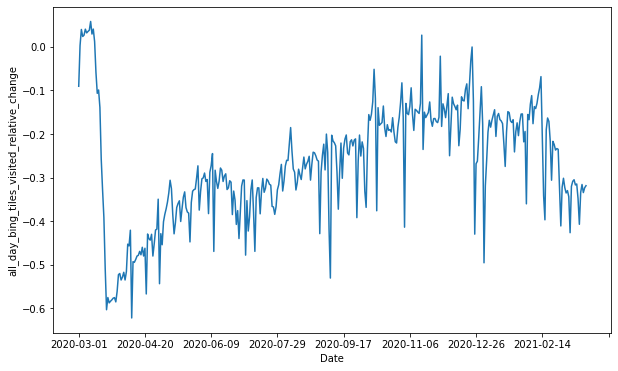

In [8]:
fig = plt.figure(figsize=(10, 6))
porto_alegre["all_day_bing_tiles_visited_relative_change"].plot()
plt.xlabel("Date")
plt.ylabel("all_day_bing_tiles_visited_relative_change")
plt.show()

We can see in this case a major reduction of mobility during the early months of the pandemic in Porto Alegre/Rio Grande do Sul/Brazil, followed by a slow rise in mobility with a downward trend after February due to the surge of cases in the city (after new mobility restrictions were deployed by the government).